#### <center> CPE378 Machine Learning 　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　Ornrakorn Mekchaiporn 62070505238 </center>
# <center>Lab of Lecture 5 - Text Classification</center>
---

# Activity

- Use the harry-potter dataset
- Explore the pattern
- Identify the cleaning points
- Conduct text cleaning
- Explore the word and character distribution
- Do you see different patterns from what you observed in the morning?

# 1. Loading data

In [1]:
import nltk
f = open('../Data/harry_7books.txt', encoding='utf8')
raw = f.read()
print(raw)
raw[:1000]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



'Harry Potter\n\n\n\nand the Chamber of Secrets\n\n\n\n\n\nby\n\nJ. K. Rowling\n\nIllustrations by Mary Grandpré\n\n\n\n\n\nArthur A. Levine Books\n\nAn Imprint Of Scholastic Press\n\n\n\n\n\nFor Seán P. F. Harris.\n\nGetaway driver and foul-weather friend\n\n\n\n\n\nText copyright © 1999 by J. K. Rowling.\n\nIllustrations by Mary GrandPré copyright © 1999 Warner Bros.\n\nAll rights reserved. Published by Scholastic Press, a division of Scholastic Inc.,\n\nPublishers since 1920.\n\nSCHOLASTIC, SCHOLASTIC PRESS, and the LANTERN LOGO\n\nare trademarks and/or registered trademarks of Scholastic Inc.\n\n\n\nHARRY POTTER, characters, names, and related indicia are trademarks and © Warner Bros.\n\nHarry Potter Publishing Rights © J. K. Rowling\n\n\n\nNo part of this publication may be reproduced, or stored in a retrieval system, or transmitted\n\nin any form or by any means, electronic, mechanical, photocopying, recording, or otherwise,\n\nwithout written permission of the publisher. For inf

# 2. Cleaning Data

### -  เลือก tokens เฉพาะที่ตรงเงื่อนไขของ \w+ (a-zA-Z0-9 1 ตัวขึ้นไป)

In [4]:
tokens = nltk.regexp_tokenize(raw, r'\w+')
print(tokens[400:600])

['back', 'but', 'his', 'words', 'were', 'drowned', 'by', 'a', 'long', 'loud', 'belch', 'from', 'the', 'Dursleys', 'son', 'Dudley', 'I', 'want', 'more', 'bacon', 'There', 's', 'more', 'in', 'the', 'frying', 'pan', 'sweetums', 'said', 'Aunt', 'Petunia', 'turning', 'misty', 'eyes', 'on', 'her', 'massive', 'son', 'We', 'must', 'build', 'you', 'up', 'while', 'we', 've', 'got', 'the', 'chance', 'I', 'don', 't', 'like', 'the', 'sound', 'of', 'that', 'school', 'food', 'Nonsense', 'Petunia', 'I', 'never', 'went', 'hungry', 'when', 'I', 'was', 'at', 'Smelt', 'ings', 'said', 'Uncle', 'Vernon', 'heartily', 'Dudley', 'gets', 'enough', 'don', 't', 'you', 'son', 'Dudley', 'who', 'was', 'so', 'large', 'his', 'bottom', 'drooped', 'over', 'either', 'side', 'of', 'the', 'kitchen', 'chair', 'grinned', 'and', 'turned', 'to', 'Harry', 'Pass', 'the', 'frying', 'pan', 'You', 've', 'forgotten', 'the', 'magic', 'word', 'said', 'Harry', 'irritably', 'The', 'effect', 'of', 'this', 'simple', 'sentence', 'on', 'the

### -  เปลี่ยนให้เป็น ตัวพิมพ์เล็ก ทั้งหมด

In [5]:
tokens_lower = [w.lower() for w in tokens]
print(tokens_lower[400:600])

['back', 'but', 'his', 'words', 'were', 'drowned', 'by', 'a', 'long', 'loud', 'belch', 'from', 'the', 'dursleys', 'son', 'dudley', 'i', 'want', 'more', 'bacon', 'there', 's', 'more', 'in', 'the', 'frying', 'pan', 'sweetums', 'said', 'aunt', 'petunia', 'turning', 'misty', 'eyes', 'on', 'her', 'massive', 'son', 'we', 'must', 'build', 'you', 'up', 'while', 'we', 've', 'got', 'the', 'chance', 'i', 'don', 't', 'like', 'the', 'sound', 'of', 'that', 'school', 'food', 'nonsense', 'petunia', 'i', 'never', 'went', 'hungry', 'when', 'i', 'was', 'at', 'smelt', 'ings', 'said', 'uncle', 'vernon', 'heartily', 'dudley', 'gets', 'enough', 'don', 't', 'you', 'son', 'dudley', 'who', 'was', 'so', 'large', 'his', 'bottom', 'drooped', 'over', 'either', 'side', 'of', 'the', 'kitchen', 'chair', 'grinned', 'and', 'turned', 'to', 'harry', 'pass', 'the', 'frying', 'pan', 'you', 've', 'forgotten', 'the', 'magic', 'word', 'said', 'harry', 'irritably', 'the', 'effect', 'of', 'this', 'simple', 'sentence', 'on', 'the

### -  ลบ \xad ออก

In [6]:
#แทนที่ \xad ด้วยโล่ง ๆ 
tokens_del_xad = [w.replace('\xad','') for w in tokens_lower]
tokens_del_xad[410:500]

['belch',
 'from',
 'the',
 'dursleys',
 'son',
 'dudley',
 'i',
 'want',
 'more',
 'bacon',
 'there',
 's',
 'more',
 'in',
 'the',
 'frying',
 'pan',
 'sweetums',
 'said',
 'aunt',
 'petunia',
 'turning',
 'misty',
 'eyes',
 'on',
 'her',
 'massive',
 'son',
 'we',
 'must',
 'build',
 'you',
 'up',
 'while',
 'we',
 've',
 'got',
 'the',
 'chance',
 'i',
 'don',
 't',
 'like',
 'the',
 'sound',
 'of',
 'that',
 'school',
 'food',
 'nonsense',
 'petunia',
 'i',
 'never',
 'went',
 'hungry',
 'when',
 'i',
 'was',
 'at',
 'smelt',
 'ings',
 'said',
 'uncle',
 'vernon',
 'heartily',
 'dudley',
 'gets',
 'enough',
 'don',
 't',
 'you',
 'son',
 'dudley',
 'who',
 'was',
 'so',
 'large',
 'his',
 'bottom',
 'drooped',
 'over',
 'either',
 'side',
 'of',
 'the',
 'kitchen',
 'chair',
 'grinned',
 'and',
 'turned']

### -  Remove stopwords

In [7]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [8]:
tokens_del_stopword = [w for w in tokens_del_xad if not w in stop_words]  
tokens_del_stopword[410:500]

['harry',
 'closely',
 'corners',
 'small',
 'sharp',
 'eyes',
 'ever',
 'since',
 'harry',
 'come',
 'home',
 'summer',
 'holidays',
 'un',
 'cle',
 'vernon',
 'treating',
 'like',
 'bomb',
 'might',
 'go',
 'moment',
 'harry',
 'potter',
 'normal',
 'boy',
 'mat',
 'ter',
 'fact',
 'normal',
 'possible',
 'harry',
 'potter',
 'wizard',
 'wizard',
 'fresh',
 'first',
 'year',
 'hogwarts',
 'school',
 'witchcraft',
 'wizardry',
 'dursleys',
 'unhappy',
 'back',
 'holidays',
 'nothing',
 'harry',
 'felt',
 'missed',
 'hogwarts',
 'much',
 'like',
 'constant',
 'stomachache',
 'missed',
 'castle',
 'secret',
 'passageways',
 'ghosts',
 'classes',
 'though',
 'perhaps',
 'snape',
 'potions',
 'master',
 'mail',
 'arriving',
 'owl',
 'eating',
 'banquets',
 'great',
 'hall',
 'sleep',
 'ing',
 'four',
 'poster',
 'bed',
 'tower',
 'dormitory',
 'visiting',
 'gamekeeper',
 'hagrid',
 'cabin',
 'next',
 'forbidden',
 'forest',
 'grounds',
 'especially',
 'quidditch']

### -  ทำLemmatization

In [9]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
tokens_lem_s = [wnl.lemmatize(w) for w in tokens_del_stopword] 
tokens_lem_s[410:500]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['harry',
 'closely',
 'corner',
 'small',
 'sharp',
 'eye',
 'ever',
 'since',
 'harry',
 'come',
 'home',
 'summer',
 'holiday',
 'un',
 'cle',
 'vernon',
 'treating',
 'like',
 'bomb',
 'might',
 'go',
 'moment',
 'harry',
 'potter',
 'normal',
 'boy',
 'mat',
 'ter',
 'fact',
 'normal',
 'possible',
 'harry',
 'potter',
 'wizard',
 'wizard',
 'fresh',
 'first',
 'year',
 'hogwarts',
 'school',
 'witchcraft',
 'wizardry',
 'dursleys',
 'unhappy',
 'back',
 'holiday',
 'nothing',
 'harry',
 'felt',
 'missed',
 'hogwarts',
 'much',
 'like',
 'constant',
 'stomachache',
 'missed',
 'castle',
 'secret',
 'passageway',
 'ghost',
 'class',
 'though',
 'perhaps',
 'snape',
 'potion',
 'master',
 'mail',
 'arriving',
 'owl',
 'eating',
 'banquet',
 'great',
 'hall',
 'sleep',
 'ing',
 'four',
 'poster',
 'bed',
 'tower',
 'dormitory',
 'visiting',
 'gamekeeper',
 'hagrid',
 'cabin',
 'next',
 'forbidden',
 'forest',
 'ground',
 'especially',
 'quidditch']

จะเห็นว่าบางคำ เช่น treating ยังไม่ถูก Lemmatize จึงต้องทำต่อให้ถูกต้อง

### -  ทำLemmatization ต่อ โดยกำหนด pos='v'

In [10]:
nltk.download('wordnet')
wnl = nltk.WordNetLemmatizer()
tokens_lem_verb = [wnl.lemmatize(w, pos='v') for w in tokens_lem_s]
tokens_lem_verb[410:500]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['harry',
 'closely',
 'corner',
 'small',
 'sharp',
 'eye',
 'ever',
 'since',
 'harry',
 'come',
 'home',
 'summer',
 'holiday',
 'un',
 'cle',
 'vernon',
 'treat',
 'like',
 'bomb',
 'might',
 'go',
 'moment',
 'harry',
 'potter',
 'normal',
 'boy',
 'mat',
 'ter',
 'fact',
 'normal',
 'possible',
 'harry',
 'potter',
 'wizard',
 'wizard',
 'fresh',
 'first',
 'year',
 'hogwarts',
 'school',
 'witchcraft',
 'wizardry',
 'dursleys',
 'unhappy',
 'back',
 'holiday',
 'nothing',
 'harry',
 'felt',
 'miss',
 'hogwarts',
 'much',
 'like',
 'constant',
 'stomachache',
 'miss',
 'castle',
 'secret',
 'passageway',
 'ghost',
 'class',
 'though',
 'perhaps',
 'snape',
 'potion',
 'master',
 'mail',
 'arrive',
 'owl',
 'eat',
 'banquet',
 'great',
 'hall',
 'sleep',
 'ing',
 'four',
 'poster',
 'bed',
 'tower',
 'dormitory',
 'visit',
 'gamekeeper',
 'hagrid',
 'cabin',
 'next',
 'forbid',
 'forest',
 'grind',
 'especially',
 'quidditch']

จากการกำหนด pos='v' จะทำให้ verb ถูกทำให้ลดรูปแล้ว

# 3. Explore the word and character distribution

### -  Word Frequency Analysis

In [11]:
from collections import Counter

counter = Counter(tokens_lem_verb)
print(counter)

Counter({'harry': 18254, 'say': 15921, 'ron': 6332, 'look': 5828, 'hermione': 5209, 'get': 4268, 'go': 4121, 'know': 4002, 'think': 3538, 'back': 3355, 'dumbledore': 3123, 'one': 2887, 'could': 2862, 'see': 2705, 'like': 2571, 'come': 2569, 'tell': 2354, 'would': 2310, 'around': 2262, 'eye': 2187, 'mr': 2173, 'take': 2148, 'make': 2074, 'hagrid': 2003, 'well': 1980, 'time': 1967, 'face': 1961, 'professor': 1959, 'hand': 1948, 'wand': 1857, 'snape': 1829, 'though': 1819, 'want': 1766, 'head': 1743, 'still': 1729, 'right': 1682, 'hear': 1637, 'turn': 1601, 'weasley': 1596, 'voice': 1595, 'give': 1568, 'ask': 1561, 'door': 1544, 'leave': 1499, 'try': 1482, 'seem': 1456, 'room': 1411, 'find': 1350, 'stand': 1343, 'malfoy': 1295, 'way': 1225, 'potter': 1222, 'open': 1221, 'saw': 1221, 'even': 1219, 'thing': 1191, 'voldemort': 1177, 'never': 1153, 'something': 1137, 'away': 1127, 'ing': 1124, 'sirius': 1113, 'good': 1106, 'behind': 1106, 'long': 1096, 'year': 1095, 'last': 1090, 'two': 1068,

### -  Frequency plot

In [12]:
import pandas as pd
df = pd.DataFrame(tokens_lem_verb)

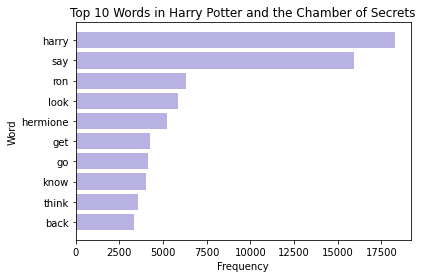

In [13]:
import matplotlib.pyplot as plt

df_stack = df.stack(level=0) 
counter = df_stack.value_counts()[0:10] # top 10
plt.barh(counter.index, counter.values, color = '#b8b2e2') 
plt.gca().invert_yaxis()
plt.title("Top 10 Words in Harry Potter and the Chamber of Secrets")
plt.xlabel('Frequency') 
plt.ylabel('Word')
plt.show()

    Q: Do you see different patterns from what you observed in the morning?
    A: เมื่อเปรียบเทียบระหว่าง Lab ที่ทำ กับที่ทำภายในคาบเรียน จะเห็นว่าใน Lab ที่ทำ ผลลัพธ์ของคำที่ได้มีความถูกต้องมากกว่าแบบที่ทำภายในคาบเรียน 
    เนื่องจากมีการ Clean ข้อมูลที่มากกว่า คือ การลบสัญลักษณ์ที่ไม่จำเป็นออก การลบ stopwords และการทำ Lemmatization ซึ่งเป็นการลดรูปของ
    คำที่มีความหมายเดียวกัน 

---